In [1]:
import math
import sympy
from sympy import latex, solve, Eq
from IPython.display import HTML, display
from sympy.abc import x, a, b

%matplotlib notebook
%install_ext https://raw.githubusercontent.com/meduz/ipython_magics/master/tikzmagic.py
%load_ext tikzmagic
    
sympy.init_printing()

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


/home/gregor/.virtualenvs/oma/lib/python3.4/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension(s)as a python packages.
  "as a python packages.", UserWarning)


# OMA 2. kolokvij 2012/2013

## 1. naloga

*V polkrog z radijem 1 vcrtamo pravokotnik ABCD tako, da oglisci A in B lezita na premeru, oglisci C in D pa na loku polkroga. Koliksni naj bosta dolzini stranic pravokotnika, da bo ploscina pravokotnika maksimalna?*

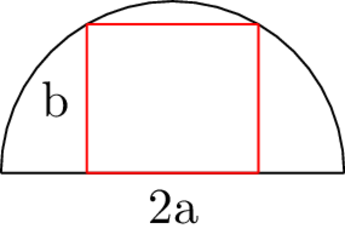

In [2]:
%%tikz s 400,400 -sc 1.2 -f png
\draw [domain=0:180] plot ({cos(\x)}, {sin(\x)});
\draw (-1,0) -- (1, 0);
\draw [color=red] (-0.5, 0) -- node[below, color=black] {2a} ++ (1, 0);
\draw [color=red] (-0.5, 0.8660254037844386) -- (0.5, 0.8660254037844386);
\draw [color=red] (-0.5, 0) -- node[left, color=black] {b} ++ (0, 0.8660254037844386);
\draw [color=red] (0.5, 0.8660254037844386) -- (0.5, 0);


Maksimiziramo funkcijo $P(x)=2ab$. Velja tudi $a^2 + b^2 = 1$. Namesto ploscine bomo maksimizirali njen kvadrat (ki ima maksimum v isti tocki kot prvotna funkcija.

In [3]:
P = sympy.symbols('P', cls=sympy.Function)
eq1 = Eq(P(b), (2*a*b)**2)
eq2 = Eq(a**2+b**2, 1)
equation = Eq(P(b), solve([eq1, eq2], P(b), a**2)[P(b)])
equation

In [4]:
P = sympy.lambdify(b, equation.rhs)
x = sympy.symbols('x', positive=True)
solve(Eq(P(x).diff(x), 0))[0]

## 2. naloga

*Naj bo 
$$f(x,y)=3x^2-3y^2+8xy-6x-8y+3.$$*

*Izracunaj gradient funkcije $f(x,y)$.*

In [5]:
x, y = sympy.symbols('x y')
f = lambda x, y: 3*x**2 - 3*y**2 + 8*x*y-6*x-8*y+3
f(x,y).diff(x), f(x,y).diff(y)

*Izracunaj stacionarne tocke funkcije $f(x,y)$.*

In [6]:
sympy.solve([f(x,y).diff(x), f(x,y).diff(y)])

## 3. naloga

*Izracunaj odvod funkcije
$$\frac{\cos(x)}{\sin(x)}.$$*


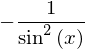

In [7]:
x = sympy.symbols('x')
f = lambda x: sympy.cos(x)/sympy.sin(x)
sympy.simplify(f(x).diff())

*S pomocjo substitucije izracunaj nedoloceni integral
$$\int \frac{\cos(x)}{\sin(x)}.$$
*

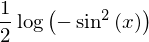

In [8]:
sympy.simplify(f(x).integrate())

V zgorjem racunu poleg konstante znotraj funkcije $\log$ manjka se absolutna vrednost (sympy racuna v kompleksnih stevilih), tako da je pravi rezultat
$$ \frac{1}{2}\log(\sin^2(x)) + C = \log(\sin^2(x)) + C.$$

*S pomocjo pravila za integriranje po delih izracunaj
$$\int\frac{x}{\sin^2(x)}.$$*

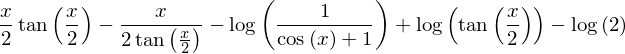

In [9]:
x = sympy.symbols('x')
f = lambda x: x/sympy.sin(x)**2
sympy.simplify(f(x).integrate())

Tudi to resitev se da poenostaviti v 
$$ \int\frac{x}{\sin^2(x)} = \log(|\sin(x)|) - x\cot(x) + C.$$

## 4. naloga

*Narisite lik, ki ga omejujeta krivulji $y=e^{2x}$ in $y=-e^{2x}+4$. Izracunajte ploscino lika.*


<IPython.core.display.Javascript object>


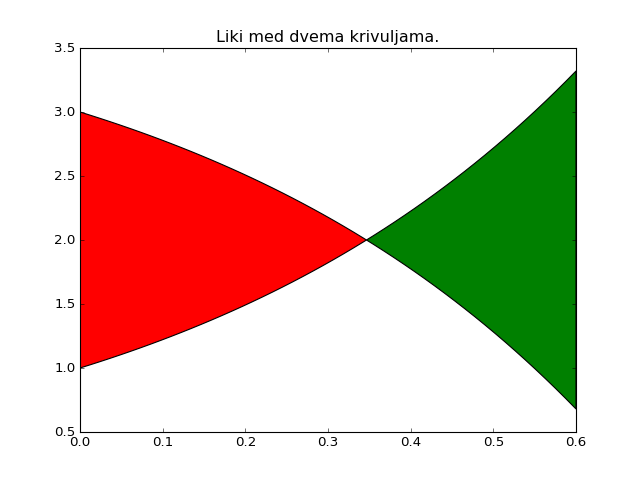

In [277]:
from matplotlib import pyplot as plt
import numpy as np
x = sympy.symbols('x')
f = lambda x: np.exp(2*x)
g = lambda x: -np.exp(2*x)+4
fig, ax = plt.subplots()
xs = np.linspace(0,0.6)
ax.fill_between(xs, f(xs),g(xs),where = f(xs)>=g(xs), facecolor='green',interpolate=True)
ax.fill_between(xs, f(xs), g(xs), where = f(xs)<= g(xs),facecolor='red',interpolate=True)
plt.title("Liki med dvema krivuljama.")

Izracunati moramo ploscino rdecega lika.

In [287]:
x = sympy.symbols('x', real=True)
f = lambda x: sympy.E**(2*x)
g = lambda x: -sympy.E**(2*x)+4
intersection = sympy.solve(sympy.Eq(f(x), g(x)))[0]
result = sympy.integrate(g(x)-f(x), (x, 0, intersection))
result

In [289]:
result.evalf()